**This Project is based on Baseball game to predict win for upcoming league their are several features which contributes to the winning count of this game ,these features are taken and analysed from Major Baseball league,2014 and as considered as the highest contributing features in order to have win count of this game**

In [424]:
###Importing necessary libraries to read Dataset####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [425]:
Baseball_data = pd.read_csv('baseball.csv')
Baseball_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


***Understanding the features/Indicators of success***

***W - The count of wins(Target/label)***

***R - Total runs scored by teams (Highest runs scorer team will be at top and Vice-Versa)***

***AB - In baseball, an at bat (AB) or time at bat is a batter's turn batting against a pitcher(Ball thrower)***

***H - A hit occurs when a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice***

***2B - A batter is credited with a double when he hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner***

***3B -  triple occurs when a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner***

***HR - In baseball, a home run (abbreviated HR) is scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate***

***BB - hitter not swinging at four pitches called out of the strike zone and awarded first base***

***SO - A strikeout occurs when a pitcher throws any combination of three swinging or looking strikes to a hitter***

***SB -  A stolen base occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner***

***RA - Runs Allowed is the amount of runs that score against a pitcher. This includes earned runs and unearned runs***

***ER -  Any run that scores against a pitcher without the benefit of an error or a passed ball***

***ERA - Earned run average represents the number of earned runs a pitcher allows per nine innings ***

***CG -A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts***

***SHO -  A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score***

***SV -  A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances***

***E - An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.***

In [426]:
###Checking the count of duplicate values in Dataset which will give us return in Booleans (False=Not present and True= Present)
Baseball_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [427]:
#checking shape of Dataset i.e. Rows and columns#
Baseball_data.shape

(30, 17)

In [501]:
##Checking Data type of features and label
Baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 29
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   WINS           29 non-null     int64
 1   Runs           29 non-null     int64
 2   At_Bats        29 non-null     int64
 3   Hits           29 non-null     int64
 4   Doubles        29 non-null     int64
 5   Triples        29 non-null     int64
 6   Home_Runs      29 non-null     int64
 7   Walks          29 non-null     int64
 8   Strike_Out     29 non-null     int64
 9   Stolen_Basis   29 non-null     int64
 10  Runs_allowed   29 non-null     int64
 11  Complete_game  29 non-null     int64
 12  Start_Shutout  29 non-null     int64
 13  Saves          29 non-null     int64
 14  Errors         29 non-null     int64
dtypes: int64(15)
memory usage: 4.7 KB


In [428]:
#Checking null values in Dataset
Baseball_data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**Renaming columns for better understanding and analysis**

In [429]:
Baseball_data.rename(columns={'W':'WINS','R':'Runs','AB':'At_Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Home_Runs','BB':'Walks','SO':'Strike_Out','SB':'Stolen_Basis','RA':'Runs_allowed','ER':'Earned_Runs','ERA':'Earned_runs_avg','CG':'Complete_game','SHO':'Start_Shutout','SV':'Saves','E':'Errors'},inplace=True)
Baseball_data.head(1)

,WINS,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Out,Stolen_Basis,Runs_allowed,Earned_Runs,Earned_runs_avg,Complete_game,Start_Shutout,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88


***Checking overall health of Data through visualization as their are no null values present we are taking the visualization from WIN onwards***

In [430]:
Baseball_data.describe()

,WINS,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Out,Stolen_Basis,Runs_allowed,Earned_Runs,Earned_runs_avg,Complete_game,Start_Shutout,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


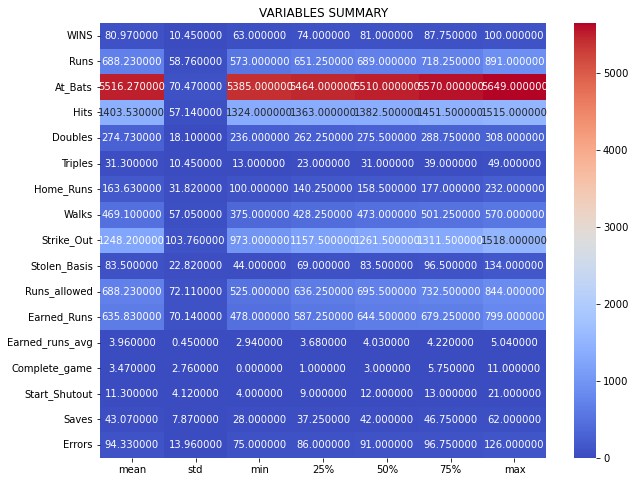

In [431]:
Baseball_data.describe()
plt.figure(figsize=(10,8))
sns.heatmap(round(Baseball_data.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks
plt.yticks
plt.title("VARIABLES SUMMARY")
plt.show()

***Observations****

**Runs(Mean-688.23,Std-58.76)data has found to be normally distributed for min to max(very less presence of outliers has been visualized)**

**At_Bats(Mean-5516.26,Std-70.46)data has found to be normally distributed for min to max(very less presence of outliers has been visualized)**

**Hits(Mean-1403.53,Std-57.14)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Doubles(Mean-274.73,Std-18.09)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Triples(Mean-31.30,Std=10.45)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Home_Runs(Mean-163.63,Std=31.82)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Walks(Mean-469.10,Std=57.05)data is not distibuted equally for min to 50%(No presence of Outliers has been visualized)**

**Strike_Out(Mean-1248.20,Std-103.75)Data has been visualized as normally distributed**

**Stolen_Basis(Mean-83.50,Std-22.81)Data has been visualized as normally distributed**

**Runs_allowed(Mean-688.23,Std-72.10)Data is not distibuted equally for min to max**

**Earned_Runs & Earned_runs_average(Data is distributed equally)**

**Shutouts & Start_Shutout(Data is distributed equally)**

**Saves & Errors(Data is found to be distributed equally)***

**Though Data distribution is looking satisfactory for maximum features but their is a bit of ambigousness present between some of them,lets understand with some deep insights of visualization**


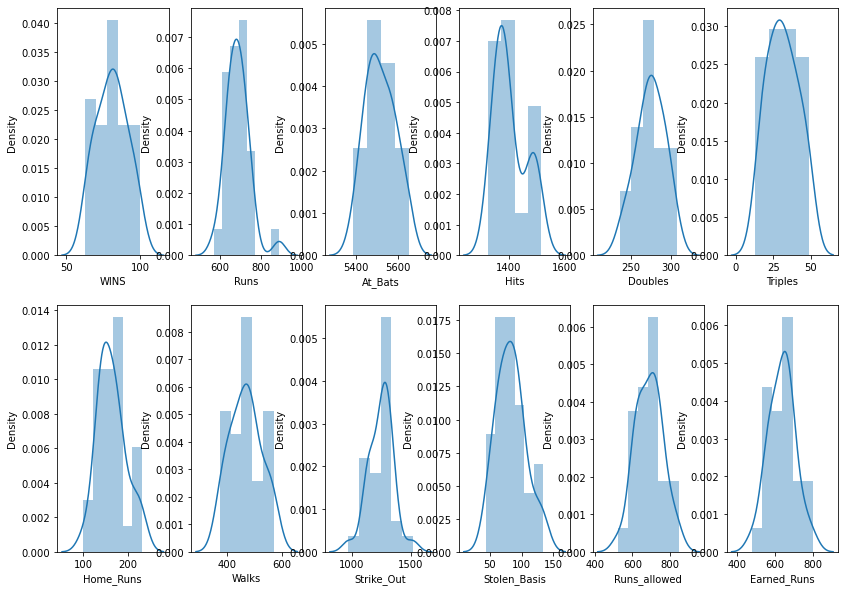

In [432]:
plt.figure(figsize=(14,10))
plotnumber=1
for column in Baseball_data:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.distplot(Baseball_data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()    

***Observations***

**We have visualized each of them carefully aand data distribution has found satisfactory for all of the features but still we can visualize the presence of outliers to some extent,lets visualize the same to have a clear picture about presence of outliers**

**Their is essence of Skewness present in Dataset which requires correction**

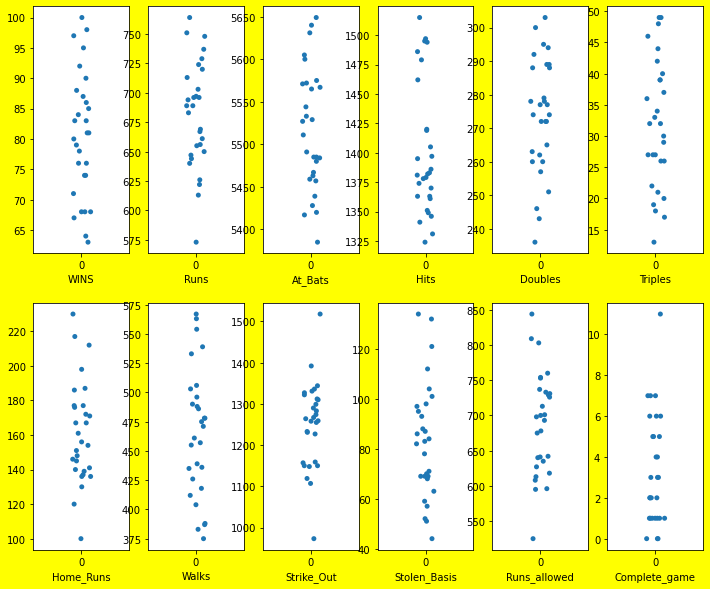

In [495]:
plt.figure(figsize=(12,10),facecolor='Yellow')
plotnumber=1
for column in Baseball_data:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.stripplot(data=Baseball_data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

                                     **Observations**
**We can clearly see columns like Strike_out,Complete game are deviating from norma course which clearly indicates the presence of outliers in Dataset**

**Apart from this other columns are also indicating the presence of outliers on a ambiguous note**
                                     

# BOX PLOT

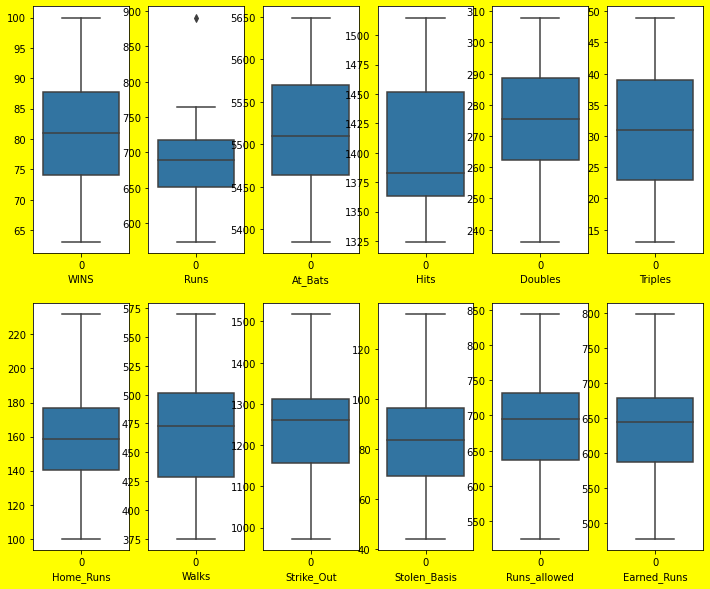

In [433]:
plt.figure(figsize=(12,10),facecolor='Yellow',edgecolor='red')
plotnumber=1
for column in Baseball_data:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.boxplot(data=Baseball_data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Observations**

**Health of Dataset is Satisfactory as through visualization it is giving a miniscule presence of outliers ,we are going to remove the same keeping in mind that dataset is small and loss percentage must be under 5%**

***We can proceed for further analysis of our Dataset** 

*****Multi-collinearity Check*****

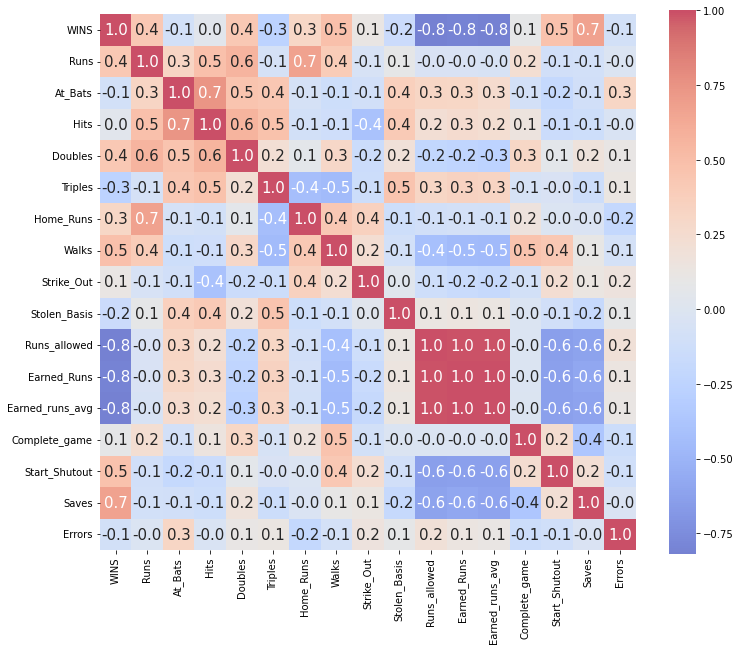

In [434]:
coreleation= Baseball_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=Baseball_data.columns,yticklabels=Baseball_data.columns,alpha=0.7,cmap= 'coolwarm')
plt.show()

***Observations***

**Earned_Runs and Earned_runs_avg is showing Multi-collinearity,we have to visualize both of them with target variable**

**Runs_allowed is showing Multi-collinearity with Earned_Runs and Earned_runs_avg we have to visualize them with target variable**

**Home_Runs and Runs is showing Multi-Collinearity**

**Multi-Collinearity has not been visualized except above mentioned features**

In [435]:
Collinearity_features = Baseball_data[['Earned_Runs','Earned_runs_avg','Runs_allowed']]
Collinearity_features.head(2)

,Earned_Runs,Earned_runs_avg,Runs_allowed
0,601,3.73,641
1,653,4.07,700


<AxesSubplot:xlabel='Runs_allowed', ylabel='Earned_Runs'>

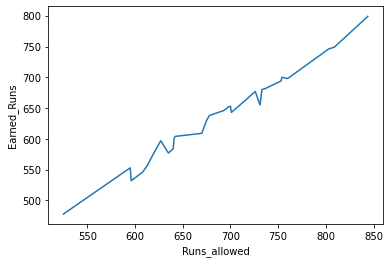

In [436]:
sns.lineplot(x='Runs_allowed',y='Earned_Runs',data=Collinearity_features)

                                               **Observations**
**Positive trend has been visualized and now through visualizing the trend we can conclude a clear sign of Multi-Collinearity**                                                
**Visualizing through heatmap has also indicated the same though realistically it is making average sense for having correlation between these features**                                                

<AxesSubplot:xlabel='Runs_allowed', ylabel='Earned_runs_avg'>

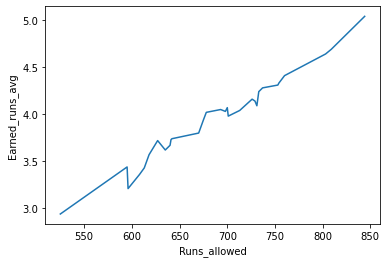

In [437]:
sns.lineplot(x='Runs_allowed',y='Earned_runs_avg',data=Collinearity_features)

  **Observations**
**Positive trend has been visualized and now through visualizing the trend we can conclude a clear sign of Multi-Collinearity**

<AxesSubplot:xlabel='Earned_Runs', ylabel='Earned_runs_avg'>

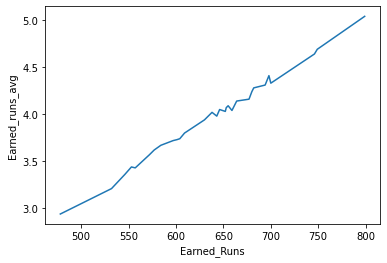

In [438]:
sns.lineplot(x='Earned_Runs',y='Earned_runs_avg',data=Collinearity_features)

                                          **Observations**
**Positive trend has been visualized and now through visualizing the trend we can conclude a clear sign of Multi-Collinearity**                                                
                                

**Visualizing the Trend in for Multi-Collinearity Features with Target Variable for final decisoning on features selection amongst these three features**

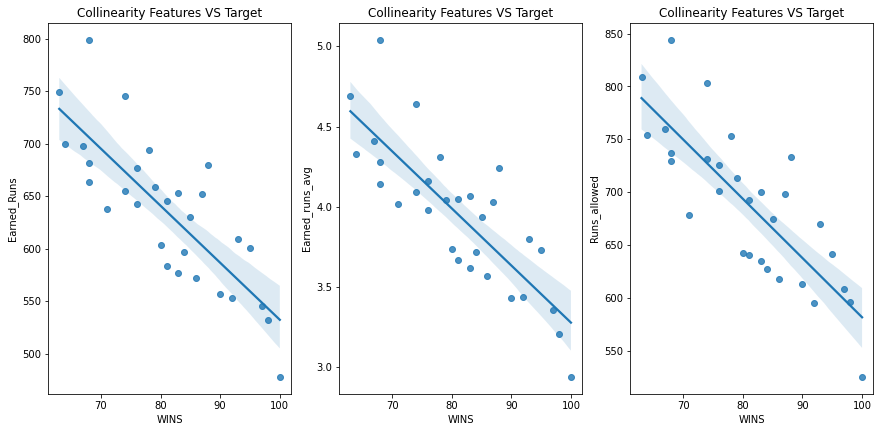

In [439]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in Collinearity_features:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.regplot(y,Collinearity_features[column])
        plt.title('Collinearity Features VS Target')
        
    
    plotnumber+=1
    
plt.show() 

                                    ***Observations***
***Their is almost same negative trend has been shown by all of three features with Target Variable,it clearly indicates that even correlation of these features will also be in negative,but thinking realistically we can say that their might be chances these features will be correlated to target Variable**


# EDA of Hitter(Baseball bat holder) oriented Features with Target Variable

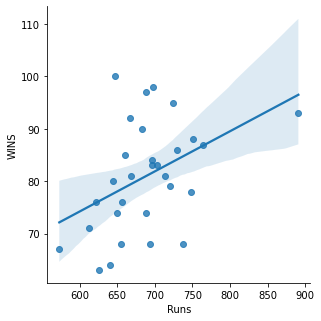

In [440]:
sns.pairplot(x_vars='Runs',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

  **Observations**

**In league matches Teams scoring is between 670 -730 is considered as the average score for maximum wins,wherein only miniscule teams have been able to cross 760-890 but winning chances at this score is highly correlated**

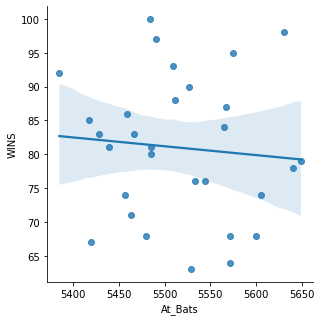

In [441]:
sns.pairplot(x_vars='At_Bats',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

  **Observations**

**At Bats scores are not amongst the most contributing feature in Wins as count of run for same is not at apex**
**As seen below and compared with doubles and triples At_Bats are very less contributing in Wins**
    

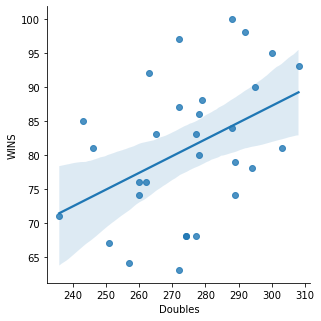

In [442]:
sns.pairplot(x_vars='Doubles',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

 **Observations**

**In League matches where hitters scoring above 280 doubles are amongst the top winning teams,here we need to nalyse trend of triples and compare them to see whether Doubles or Triples has been the key to attain count of WINS**

<AxesSubplot:xlabel='Triples', ylabel='WINS'>

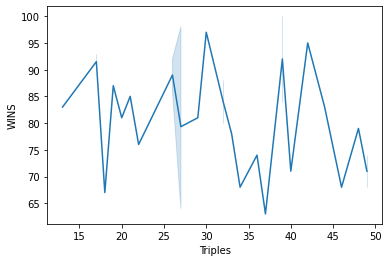

In [443]:
sns.lineplot(x='Triples',y='WINS',data=Baseball_data)


**Observations**

***Hitters scoring around 30-34 triples on an average in a league matches is more likely to have a count of wins in their bucket**

**Hitters scoring between 37-45 triples are almost equal in count of wins buckets when compared with 30-34 triples**

**Hitters targeting doubles has more chances of taking WINS in their bucket**

<AxesSubplot:xlabel='Home_Runs', ylabel='WINS'>

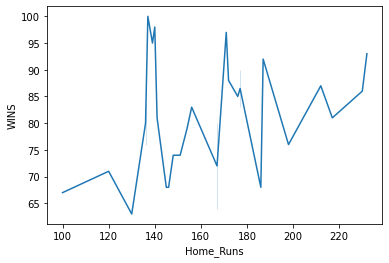

In [444]:
sns.lineplot(x='Home_Runs',y='WINS',data=Baseball_data)

**Observations**

**Their is a apex growth in wins when homeruns are between 125-140 and almost equal when homeruns are around 170** 

**Hitters hitting homeruns b/w above mentioned criteria are taking their teams to top list of wins**

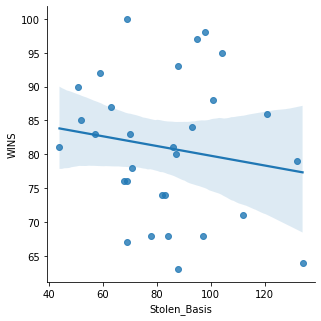

In [445]:
sns.pairplot(x_vars='Stolen_Basis',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

**Observations**

**Stolen_runs between 90-105 has counted the maximum wins in bucket,wherein very few hitters are able to cross this average** 

**Stolen_runs basis is also not amongst the prime factor to adjunct the scores in game as they are not widely used**

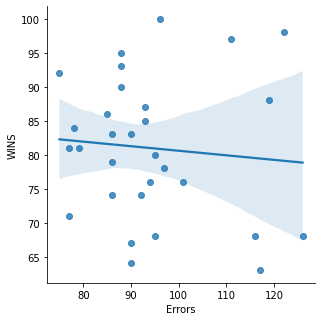

In [446]:
sns.pairplot(x_vars='Errors',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

**Errors primarily are taken in controll as misplay from ball is ranging in 88-90 hence error are contributing in other Team win**

**We can clearly visualize a good controll of teams on errors part and directly contributing to their Win**

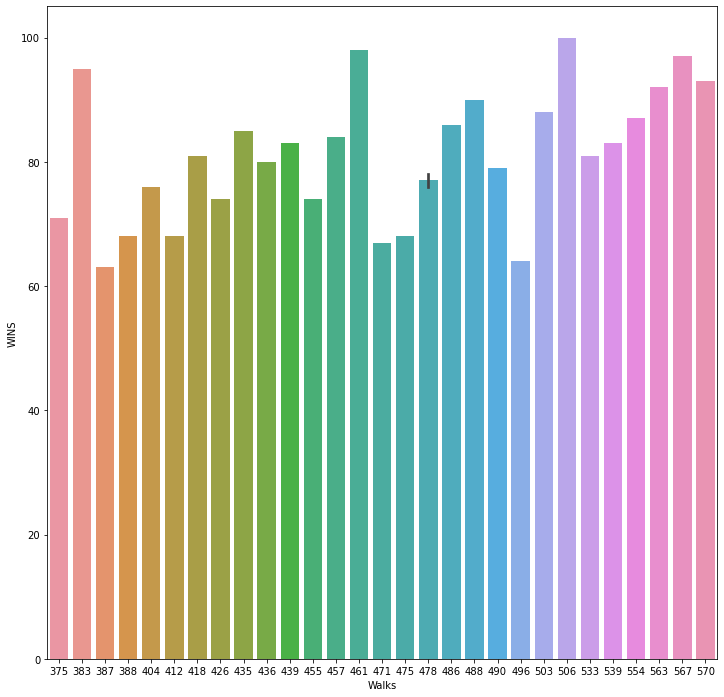

In [447]:
plt.figure(figsize=(12,12))
sns.barplot(x="Walks", y="WINS", data=Baseball_data)
plt.show()

**Observations**
**Hitters of teams having maximum wins are generating maximum walks are directly contributing for winning**

**On an average in the begining-mid-end same trend has been observed from hitters and it also takes us to conclusion that walks have been the average contributor for wins in this game**
                                       

# EDA of Pitcher(Ball holder) oriented features with Target# 

<AxesSubplot:xlabel='Strike_Out', ylabel='WINS'>

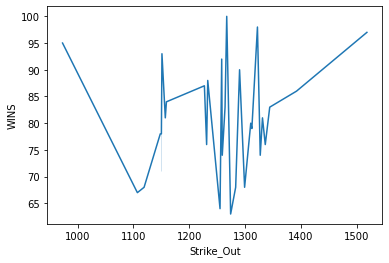

In [448]:
sns.lineplot(x='Strike_Out',y='WINS',data=Baseball_data)

**Observations**
                                     
**Pitchers throwing strike_outs are directly impacting positively on their team winning bucket maximum Strike_Out have been noticed around 1270 - 1300 this range specifies the maximum wins**                                     

<AxesSubplot:xlabel='Complete_game', ylabel='WINS'>

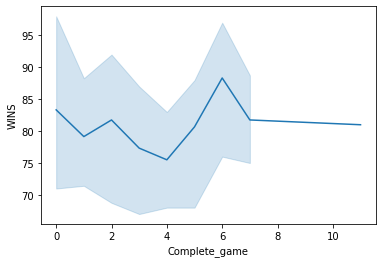

In [449]:
sns.lineplot(x='Complete_game',y='WINS',data=Baseball_data)

    **Observations**
                                              
**Pitchers has been focused on Shutouts in entire league which has been looking as key for pitchers for winning games** 

**On an average Teams 6 shutouts as in total are having maximum chance of winning**

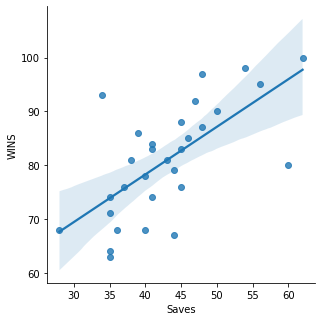

In [450]:
sns.pairplot(x_vars='Saves',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

**Observations**

***Saves has been the most credible way of gaining wins in League matches as trend is showing us that teams with maximum saves are entitles with maximum wins*** 

**Maximum Saves has been observed between 35-50 directly contributing win**

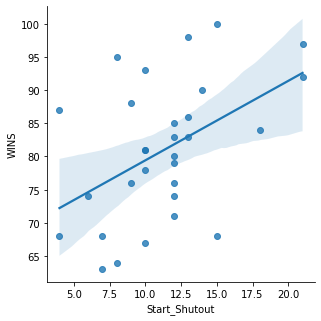

In [451]:
sns.pairplot(x_vars='Start_Shutout',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

 **Observations**
**Pitchers from min to max having a Start_Shutout is a direct advantage to keep the spot at the top**                           

**Shutouts between 10-12.5 are having maximum impact on wins**

# Fielder errors EDA

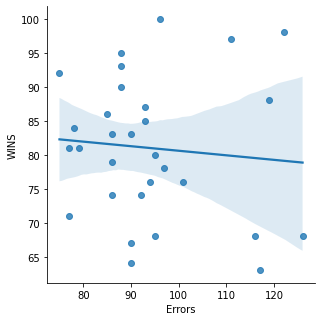

In [452]:
sns.pairplot(x_vars='Errors',y_vars='WINS',data=Baseball_data,kind='reg',height=4.5)

  **Observations**
**Field persons has also played a vital role in attaining maximum wins as when the error is low the chances of winning directly increases**  

**Number of errors between 70-100 are impacting wins at higher level**

# Correlation Check

<AxesSubplot:>

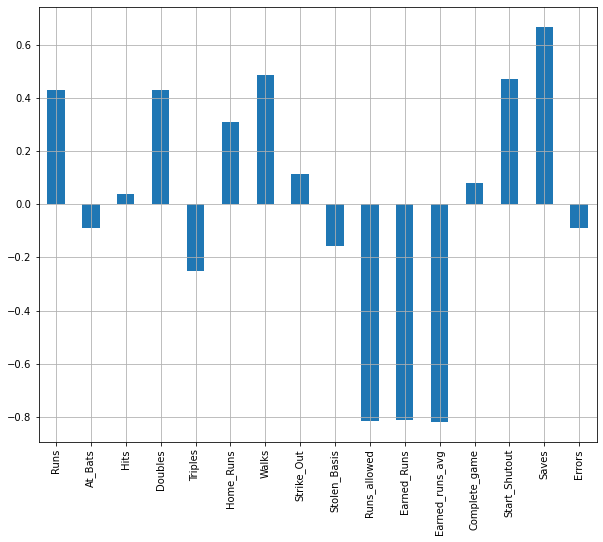

In [453]:
Baseball_data.drop('WINS',axis=1).corrwith(Baseball_data.WINS).plot(kind='bar',grid=True,figsize=(10,8))

                                        **Observations**

**Earned_Runs  and Earned _runs_avg are negatively correlated with Target variable we have visualized the Multi-Collinearity problem in these features we are going to drop these features**                                
                                  

In [456]:
Baseball_data.drop(columns=['Earned_Runs'],axis=1,inplace=True)

In [457]:
Baseball_data.drop(columns=['Earned_runs_avg'],axis=1,inplace=True)

**Removing outliers using Z score**

In [460]:
from scipy.stats import zscore

In [462]:
z = np.abs(zscore(Baseball_data))
threshold = 3
Baseball_data1 = Baseball_data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", Baseball_data.shape)
print ("Shape of the dataframe after removing outliers: ", Baseball_data1.shape)
print ("Percentage of data loss post outlier removal: ", (Baseball_data.shape[0]-Baseball_data1.shape[0])/Baseball_data.shape[0]*100)

Baseball_data=Baseball_data1.copy()

Shape of the dataframe before removing outliers:  (30, 15)
Shape of the dataframe after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  3.3333333333333335


**Visualizing for recheck of outliers Post removal**

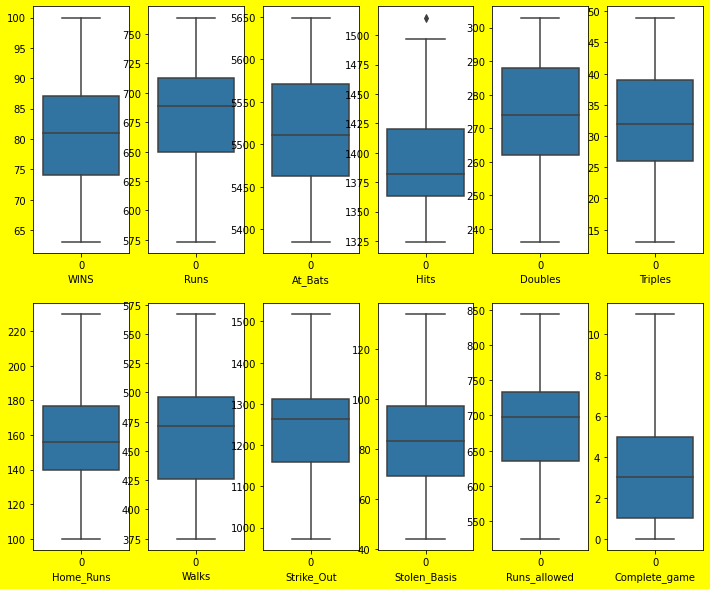

In [463]:
plt.figure(figsize=(12,10),facecolor='Yellow',edgecolor='red')
plotnumber=1
for column in Baseball_data:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.boxplot(data=Baseball_data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

                                       **Observations**
                                       
**We can clearly visualize their are no sign of Outliers post removal of same**                                       

**Dividing Dataset into Features and Target ,where X is having all features and Y is having Target/Label**

In [465]:
X = Baseball_data.drop('WINS', axis=1)
Y = Baseball_data['WINS']

**Features Scaling**

In [466]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Out,Stolen_Basis,Runs_allowed,Complete_game,Start_Shutout,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.617213,-0.570122,0.211006,1.757915


**Applying PCA for removal of Curse of Dimensionality**

In [468]:
from sklearn.decomposition import PCA

In [469]:
pca = PCA(n_components=14, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head(2)

,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Out,Stolen_Basis,Runs_allowed,Complete_game,Start_Shutout,Saves,Errors
0,-2.957996,-0.953253,2.246316,-1.216994,-2.357314,0.016125,0.626783,0.394846,0.882534,0.554004,-0.258275,-0.218896,-0.176119,0.192275
1,0.240394,0.417411,0.313526,-0.266703,-0.294763,0.504699,-0.962596,1.240400,0.256176,-0.827710,0.332404,-0.199270,-0.010978,0.486047


**Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for same**

In [470]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(10)

,Runs,At_Bats,Hits,Doubles,Triples,Home_Runs,Walks,Strike_Out,Stolen_Basis,Runs_allowed,Complete_game,Start_Shutout,Saves,Errors
0,-1.531314,-0.498970,1.648944,-1.012066,-2.313643,0.160763,0.858484,0.615354,1.330458,1.040373,-0.514105,-0.560659,-0.467027,0.926858
1,0.107095,0.491777,0.264410,-0.152456,-0.222672,0.618698,-1.355468,1.627497,0.506216,-1.732195,0.707081,-0.507797,0.121365,2.093866
2,0.231348,-0.637813,0.701913,2.267201,-0.705892,-0.741631,1.791532,1.755747,-0.285770,0.395032,1.130860,0.236013,0.754554,-0.513110
3,-0.077322,1.155694,0.152658,0.908262,0.317725,-1.081383,-0.067982,0.116307,-0.903286,2.107384,-0.284258,-0.249929,1.884386,1.055454
4,-1.507223,-0.346199,-0.214158,1.442298,-0.086620,0.354539,-1.497998,0.343404,-2.446157,-0.425055,-0.744902,0.330416,-0.356914,-1.324429
5,0.334721,-0.920914,-1.898773,-0.777902,-1.647266,-1.218018,1.274056,-0.601532,0.273842,-1.381634,-0.562001,-0.374556,1.814975,-0.060628
6,1.027540,0.787104,-1.585944,-1.051603,-1.650175,0.860395,-1.952420,-0.606167,-0.226670,0.682387,0.455062,0.592304,0.447967,0.044761
7,0.480910,0.201045,0.908332,-1.624805,0.196177,0.656288,0.297876,0.998391,-0.745228,0.631872,-1.465975,-0.995567,-1.159171,-0.668680
8,-1.242640,-0.949294,-0.449948,0.043601,-1.077768,-1.281211,-0.478003,-1.267010,-0.303047,-0.668205,0.743058,0.450942,-0.897050,0.195479
9,-0.479206,-0.647799,-0.870502,-0.066799,0.589530,-1.119003,1.033087,0.572677,1.713964,-0.186051,-1.774019,1.235321,-1.001225,0.745612


**Final features Multi-Collinearity Check using VIF**

In [471]:
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Runs,1.006200
1,At_Bats,1.017150
2,Hits,1.005998
3,Doubles,1.007102
4,Triples,1.005601
5,Home_Runs,1.011452
6,Walks,1.013386
7,Strike_Out,1.007557
8,Stolen_Basis,1.010934
9,Runs_allowed,1.002451


**No sign of Multi-collinearity**

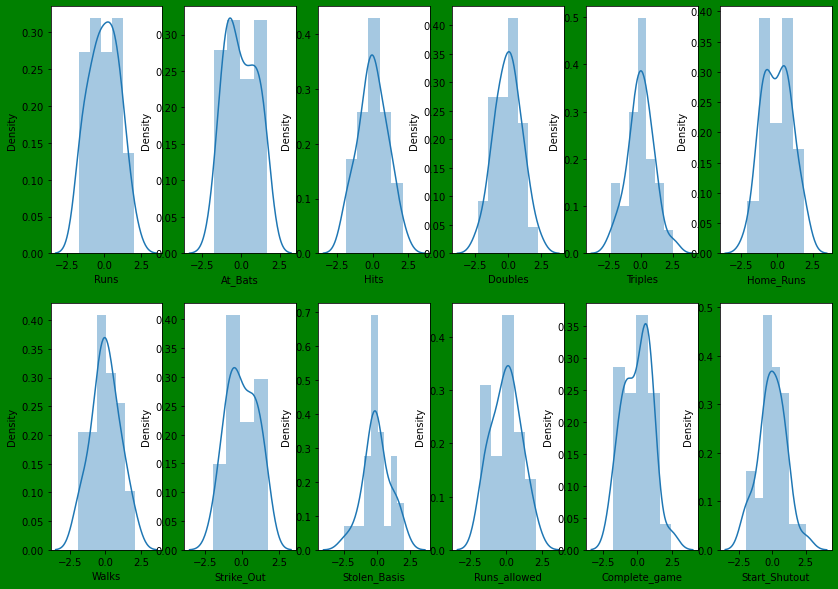

In [494]:
plt.figure(figsize=(14,10),facecolor='green')
plotnumber=1
for column in X:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.distplot(X[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()    

                                   **Observations**

**No sign of skewness has been visualized even the use of Transformer and removal of outliers had made sure that we have maximum coverage of data i.e. b/w +-3STD**

**Dataset is normally distributed**

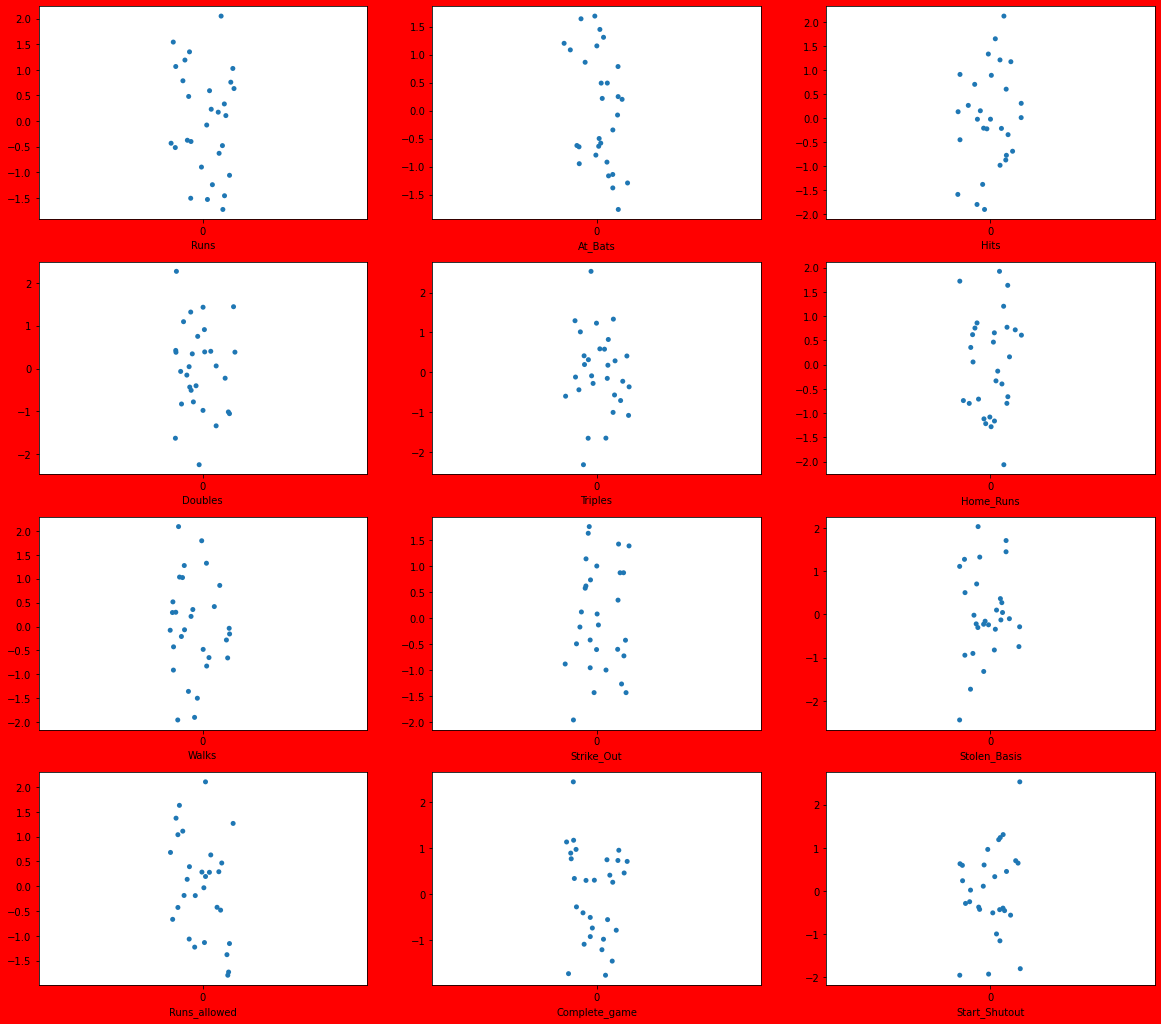

In [500]:
plt.figure(figsize=(20,18),facecolor='red')
plotnumber=1
for column in X:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        ax=sns.stripplot(data=X[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

                                               **Observations**
                                               
**Dataset is ready for further processing as we have Removed outliers,applied PCA for dimensionality reduction and Skewness has also been controlled for all features with visualization and comparison with above figure of stripplot we can clearly visualize the difference and hereby we can say our Dataset is ready for Model Building**                                              

# Model Building

**Finding the best Random state and maximum accuracy**

In [473]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9354003736325327 on Random State 708


**Splitting the data into Training and Testing**

In [474]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)

**I am defining a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

In [476]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Predicting Y_test
    pred = model.predict(X_test)
    
    #RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

**Linear Regression**

In [477]:
#Linear regression
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3.148814583020766
R2 Score is: 93.54003736325328
Cross Validation Score: 23.06111660106318
R2 Score - Cross Validation Score is 70.4789207621901


**Ridge Regression**

In [478]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 3.261707698114895
R2 Score is: 93.06852107392561
Cross Validation Score: 24.999300599656983
R2 Score - Cross Validation Score is 68.06922047426863


**Lasso Regression**

In [479]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 3.596731549865026
R2 Score is: 91.57146918584093
Cross Validation Score: 25.91211146696103
R2 Score - Cross Validation Score is 65.6593577188799


**Importing Necessary libraries**

In [481]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


**Decision Tree Regressor**

In [482]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 11.241663577958558
R2 Score is: 17.662628524890568
Cross Validation Score: -173.3181896424058
R2 Score - Cross Validation Score is 190.98081816729638


**Random Forest Regressor**

In [483]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 11.883417258847157
R2 Score is: 7.993497222198364
Cross Validation Score: -11.15563077239545
R2 Score - Cross Validation Score is 19.14912799459381


**KNeighbors Regressor**

In [484]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 11.040029122449162
R2 Score is: 20.589803995015377
Cross Validation Score: -8.094437260444954
R2 Score - Cross Validation Score is 28.68424125546033


**Support Vector Regression**

In [485]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 12.416554603529034
R2 Score is: -0.4472463222513934
Cross Validation Score: -44.952270380446656
R2 Score - Cross Validation Score is 44.50502405819526


**According to scores Linear Regression is best fitted model**

# Hyperparameter Tuning of Final model

In [486]:
#Defining best params##
fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [488]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [489]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [490]:
GSCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': False,
 'positive': True}

In [491]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -34.12378783165877


**Saving Final Model**

In [492]:
import joblib


In [493]:
filename = "Baseball.pkl"
joblib.dump(Final_Model, filename)

['Baseball.pkl']

# Model is Completed